<a href="https://colab.research.google.com/github/tejalbora/cricket_analysis/blob/main/ML_IPL_project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import collections
np.random.seed(0)

In [ ]:
# Taking input of the training dataset of all Matches from 2008 to 2023
train_data = pd.read_csv('/content/New_New_IPL_Matches_2008_2023 - New_IPL_Matches_2008_2023.csv')
train_data.head()

,Date,Season,Team1,Team2,City,WinningTeam,WonBy,Margin
0,13-04-2023,2023,Punjab Kings,Gujarat Titans,Mohali,Gujarat Titans,Wickets,6.0
1,14-04-2023,2023,Kolkata Knight Riders,Sunrisers Hyderabad,Mohali,Sunrisers Hyderabad,Runs,23.0
2,15-04-2023,2023,Royal Challengers Bangalore,Delhi Capitals,Kolkata,Royal Challengers Banglore,Runs,23.0
3,15-04-2023,2023,Lucknow Super Giants,Punjab Kings,Bengaluru,Punjab Kings,Wickets,2.0
4,16-04-2023,2023,Mumbai Indians,Kolkata Knight Riders,Lucknow,Mumbai Indians,Wickets,5.0


In [ ]:
#Checking for null values in the given dataset
train_data.isnull().sum()

Date            0
Season          0
Team1           0
Team2           0
City           51
WinningTeam     4
WonBy           1
Margin         19
dtype: int64

In [ ]:
#Replacing null values by random dummy values
train_data['City'].fillna('Abu Dhabi',inplace=True)
train_data['WinningTeam'].fillna('Draw', inplace = True)

In [ ]:
#Both Rising Pue Supergiant and Rising Pune Supergiants represents same team similarly Delhi Capitals and Delhi Daredevils,
#Deccan Chargers and Sunrisers Hyderabad ,Kings XI Punjab and Punjab Kings , Gujarat Lions and Gujarat Titans
#Royal Challengers Banglore and Royal Challengers Bangalore , Kolakata Knight Riders and Kolkata Knight Riders
train_data.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace=True)
train_data.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
train_data.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)
train_data.replace('Kings XI Punjab', 'Punjab Kings', inplace=True)
train_data.replace('Gujarat Lions', 'Gujarat Titans', inplace=True)
train_data.replace("Royal Challengers Banglore","Royal Challengers Bangalore", inplace=True)
train_data.replace("Kolakata Knight Riders","Kolkata Knight Riders", inplace=True)

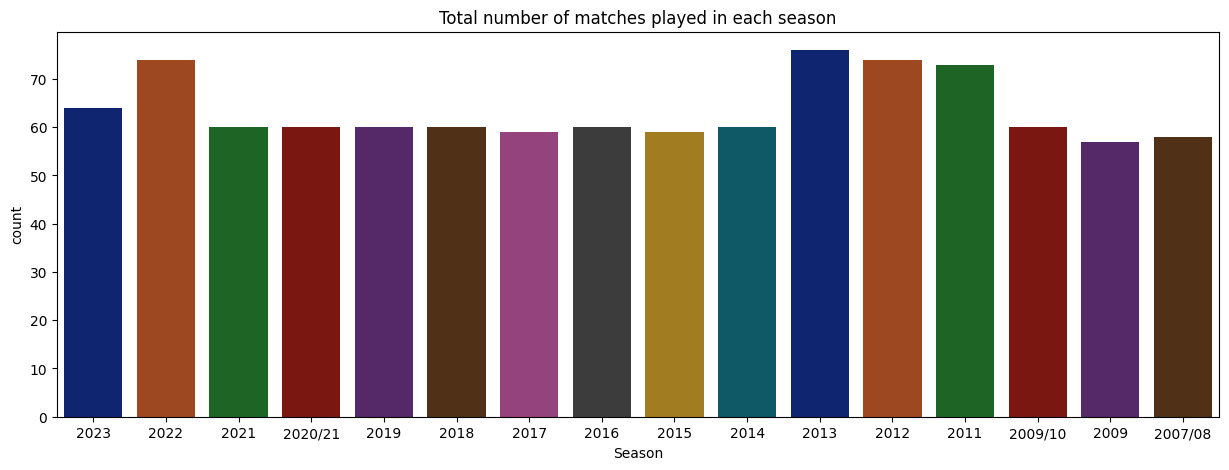

In [ ]:
# Plotting the total number of matches played per season
plt.subplots(figsize = (15,5))
sns.countplot(x = 'Season' , data = train_data, palette='dark')
plt.title('Total number of matches played in each season')
plt.show()

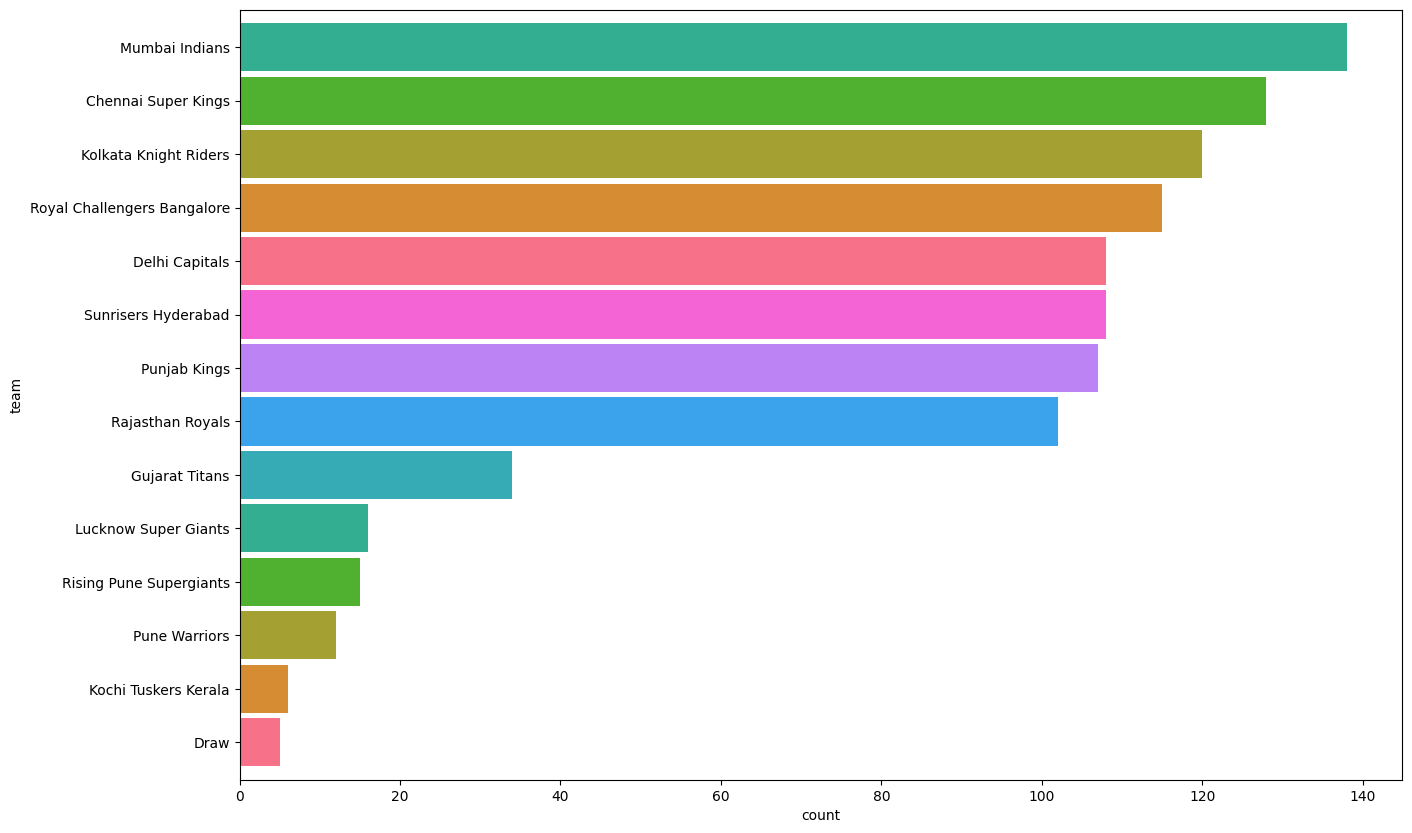

In [ ]:
# Plotting the number of matches won by each team till date
plt.subplots(figsize=(15,10))
ax = train_data['WinningTeam'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('team')
plt.show()

In [ ]:
#Encoding the data for better understanding of the model
train_data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC",
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR",
               "Kolkata Knight Riders":"KKR", "Punjab Kings":"PK",
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Titans":"GT", "Pune Warriors":"PW", "Lucknow Super Giants":"LSG"}, inplace=True)


encode = {'Team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12, 'LSG':13},
         'Team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12,'LSG':13},
         'WinningTeam': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12,'LSG':13,'Draw':14},
         'WonBy': {'Wickets':1, 'Runs':2, 'SuperOver':3, 'NoResults':4},
         'Margin': {'NA':3}}
train_data.replace(encode, inplace=True)
train_data.head(5)

,Date,Season,Team1,Team2,City,WinningTeam,WonBy,Margin
0,13-04-2023,2023,6,11,Mohali,11,1,6.0
1,14-04-2023,2023,1,5,Mohali,5,2,23.0
2,15-04-2023,2023,7,8,Kolkata,7,2,23.0
3,15-04-2023,2023,13,6,Bengaluru,6,1,2.0
4,16-04-2023,2023,4,1,Lucknow,4,1,5.0


In [ ]:
#Input values(columns) for training the model
dicVal = encode['WinningTeam']
train = train_data[['Team1','Team2', 'WinningTeam', 'City', 'WonBy', 'Margin']]
train.head(5)

,Team1,Team2,WinningTeam,City,WonBy,Margin
0,6,11,11,Mohali,1,6.0
1,1,5,5,Mohali,2,23.0
2,7,8,7,Kolkata,2,23.0
3,13,6,6,Bengaluru,1,2.0
4,4,1,4,Lucknow,1,5.0


In [ ]:
df = pd.DataFrame(train)
var_mod = ['City']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])


X = df[['Team1', 'Team2', 'City']]
y = df[['WinningTeam']]
sc = StandardScaler()
X = sc.fit_transform(X)


In [ ]:
# Checking the accuracy of various algorithms
# before choosing the most accurate one

import warnings
warnings.filterwarnings('ignore')

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X,y)
print("Logistic Regression accuracy: ",(logistic_model.score(X,y))*100)

# Random Forest Classifier
Random_model = RandomForestClassifier()
Random_model.fit(X,y)
print("Random Forest accuracy: ", (Random_model.score(X,y))*100)

# Knn Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X,y)
print("KNeighbor Classifier accuracy", (knn_model.score(X,y))*100)

# Naive Bayes Theorem
NB_model = GaussianNB()
NB_model.fit(X,y)
print("Gaussion Navie Bayis accuracy: " ,(NB_model.score(X,y))*100)

# Decision tree Algorithm
decision_model = DecisionTreeClassifier()
decision_model.fit(X,y)
print("Decision Tree Classifier accuracy: ", (decision_model.score(X,y))*100)

Logistic Regression accuracy:  20.315581854043394
Random Forest accuracy:  85.4043392504931
KNeighbor Classifier accuracy 63.510848126232744
Gaussion Navie Bayis accuracy:  26.13412228796844
Decision Tree Classifier accuracy:  85.4043392504931


In [ ]:
# testing the model on test data
test_data = pd.read_csv('/content/New_New_IPL_Fixtures_2023 - IPL_Fixtures_2023.csv')


test_data.replace('Royal Challengers Banglore', 'Royal Challengers Bangalore', inplace=True)
test_data.replace('Kolakata Knight Riders', 'Kolkata Knight Riders', inplace=True)


test_data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC",
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR",
               "Kolkata Knight Riders":"KKR", "Punjab Kings":"PK",
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Titans":"GT", "Pune Warriors":"PW", "Lucknow Super Giants":"LSG"}, inplace=True)


encode = {'Team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12,'LSG':13,'TBA':14},
         'Team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12,'LSG':13,'TBA':14},
         'Winner': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12,'LSG':13,'Draw':14}}
test_data.replace(encode,inplace=True)


test_data.head(5)

,Date,Season,Team1,Team2,City,WinningTeam,WonBy,Margin
0,18-May-23,2023,5,7,Hyderabad,NaN,NaN,NaN
1,19-May-23,2023,6,3,Dharamshala,NaN,NaN,NaN
2,20-May-23,2023,8,2,Delhi,NaN,NaN,NaN
3,20-May-23,2023,1,13,Kolkata,NaN,NaN,NaN
4,21-May-23,2023,4,5,Mumbai,NaN,NaN,NaN


In [ ]:
print('Training DataFrame:')
features = df[['Team1', 'Team2']]
print(features.head())
print()
print('Testing DataFrame:')
df1 = pd.DataFrame(test_data)
features1 = df1[['Team1', 'Team2']]
print(features1.head())

Training DataFrame:
   Team1  Team2
0      6     11
1      1      5
2      7      8
3     13      6
4      4      1

Testing DataFrame:
   Team1  Team2
0      5      7
1      6      3
2      8      2
3      1     13
4      4      5


In [ ]:
array123 = df.iloc[:64, 2]
array123

print("Matches Won till now : ")
prev_count = collections.Counter(array123)
for key, value in prev_count.items():
   print("Team " + f"{key}: {value}")

Matches Won till now : 
Team 11: 9
Team 5: 4
Team 7: 6
Team 6: 6
Team 4: 7
Team 3: 6
Team 2: 7
Team 13: 7
Team 8: 5
Team 1: 6
Team 14: 1


In [ ]:
# Predicting the values
clf = RandomForestClassifier(n_jobs =2, random_state=0)
clf.fit(features, y)
arr = clf.predict(features1)
print(arr)

#Counting the total number of matches won by each team int the current season
print("Matches to be won as per the predictions : ")
new_count = collections.Counter(arr)
for key, value in new_count.items():
   print("Team " + f"{key}: {value}")

[ 5  3  2  1  4 11]
Matches to be won as per the predictions : 
Team 5: 1
Team 3: 1
Team 2: 1
Team 1: 1
Team 4: 1
Team 11: 1


In [ ]:
new_count.update(prev_count)
print("Final Wins before the Qualifiers : ")

df_points = pd.DataFrame.from_dict(new_count, orient='index').reset_index()
df_points = df_points.rename(columns={'index':'Team', 0:'Matches Won'})
df_points


Final Wins before the Qualifiers : 


,Team,Matches Won
0,5,5
1,3,7
2,2,8
3,1,7
4,4,8
5,11,10
6,7,6
7,6,6
8,13,7
9,8,5


In [ ]:
decode = {'Team': {1: 'KKR', 2:'CSK',3:'RR',4:'MI',5:'SRH',6:'PK',7:'RCB',8:'DC',9:'KTK',10:'RPS',11:'GT',12:'PW',
                   13:'LSG',14:'TBA'}}


df_points.replace({"MI":"Mumbai Indians", "DC":"Delhi Capitals",
               "SRH":"Sunrisers Hyderabad", "RR":"Rajasthan Royals",
               "KKR":"Kolkata Knight Riders", "PK":"Punjab Kings",
               "CSK":"Chennai Super Kings", "RCB":"Royal Challengers Bangalore",
              "KTK":"Kochi Tuskers Kerala", "RPS":"Rising Pune Supergiants",
              "GT":"Gujarat TitanS", "PW":"Pune Warriors", "LSG":"Lucknow Super Giants"}, inplace=True)

df_points.replace(decode,inplace=True)
df_final_points = df_points.sort_values(by = 'Matches Won', ascending = False)
df_final_points.insert(0, 'Rank', range(1, 1 + len(df_final_points)))
df2 =  df_final_points.to_string(index=False)
print(df2)

 Rank Team  Matches Won
    1   GT           10
    2  CSK            8
    3   MI            8
    4   RR            7
    5  KKR            7
    6  LSG            7
    7  RCB            6
    8   PK            6
    9  SRH            5
   10   DC            5
   11  TBA            1


In [ ]:
print('Qualifier 1: Gujrat Titans v/s Chennai Super Kings')
print('Eliminator 1: Lucknow Super Giants v/s Mumbai Indians')

Qualifier 1: Gujrat Titans v/s Chennai Super Kings
Eliminator 1: Lucknow Super Giants v/s Mumbai Indians


In [ ]:
qualifier_train_data = pd.read_csv('Qualifiers.csv')
qualifier_train_data.head()

,Match,City,Season,Team1,Team2,WinningTeam,WonBy,Margin
0,Final,Ahmedabad,2022,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Wickets,7
1,Qualifier 2,Ahmedabad,2022,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,Wickets,7
2,Eliminator,Kolkata,2022,Lucknow Super Giants,Royal Challengers Bangalore,Royal Challengers Bangalore,Runs,14
3,Qualifier 1,Kolkata,2022,Gujarat Titans,Rajasthan Royals,Gujarat Titans,Wickets,7
4,Final,Dubai,2021,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,Runs,27


In [ ]:
qualifier_train_data.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'}, inplace = True)
qualifier_train_data.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC",
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR",
               "Kolkata Knight Riders":"KKR", "Punjab Kings":"PK",
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB","Rising Pune Supergiants":"RPS",
              "Gujarat Titans":"GT", "Lucknow Super Giants":"LSG"}, inplace=True)

qualifier_train_data.replace({"Runs":0, "Wickets":1}, inplace=True)

encode = {'Team1': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12, 'LSG':13},
         'Team2': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12,'LSG':13},
          'WinningTeam': {'KKR':1,'CSK':2,'RR':3,'MI':4,'SRH':5,'PK':6,'RCB':7,'DC':8,'KTK':9,'RPS':10,'GT':11,'PW':12,'LSG':13,'Draw':14},
         'Match': {'Final': 0, 'Qualifier 1': 1, 'Eliminator': 2, 'Qualifier 2': 3}}
qualifier_train_data.replace(encode, inplace=True)
qualifier_train_data.head(5)

,Match,City,Season,Team1,Team2,WinningTeam,WonBy,Margin
0,0,Ahmedabad,2022,11,3,11,1,7
1,3,Ahmedabad,2022,3,7,3,1,7
2,2,Kolkata,2022,13,7,7,0,14
3,1,Kolkata,2022,11,3,11,1,7
4,0,Dubai,2021,2,1,2,0,27


In [ ]:
train_q = qualifier_train_data[['Team1','Team2','WinningTeam']]
train_q.head(5)

,Team1,Team2,WinningTeam
0,11,3,11
1,3,7,3
2,13,7,7
3,11,3,11
4,2,1,2


In [ ]:
df_q = pd.DataFrame(train_q)

qX = df_q[['Team1', 'Team2']]
qy = df_q[['WinningTeam']]
sc = StandardScaler()
X = sc.fit_transform(qX)

In [ ]:
test_data_q = {
  "Team1": ['Gujarat Titans', 'Lucknow Super Giants'],
  "Team2": ['Chennai Super Kings', 'Mumbai Indians']
}
df_test_q = pd.DataFrame(test_data_q)
df_test_q.replace({'Chennai Super Kings':2, 'Gujarat Titans':11, 'Mumbai Indians':4, 'Lucknow Super Giants':13}, inplace = True)


features_q = df_q[['Team1', 'Team2']]
features1_q = df_test_q[['Team1', 'Team2']]

In [ ]:
clf1 = RandomForestClassifier(n_jobs =2, random_state=1)
clf1.fit(features_q, qy)
arr_q = clf1.predict(features1_q)
arr_q

array([2, 4])

In [ ]:
print('Winner of Qualifier 1 is: Chennai Super Kings')
print('Winner of Eliminator is: Mumbai Indians')
print('The Qualifier 2 will be: Gujrat Titans v/s Mumbai Indians')

Winner of Qualifier 1 is: Chennai Super Kings
Winner of Eliminator is: Mumbai Indians
The Qualifier 2 will be: Gujrat Titans v/s Mumbai Indians


In [ ]:
test_data_q2 = {
  "Team1": ['Gujrat Titans'],
  "Team2": ['Mumbai Indians']
}

df_test_q2 = pd.DataFrame(test_data_q2)
df_test_q2.replace({'Mumbai Indians':4,'Gujrat Titans':11}, inplace = True)

features_q2 = df_q[['Team1', 'Team2']]

features1_q2 = df_test_q2[['Team1', 'Team2']]


In [ ]:
clf1.fit(features_q2, qy)
arr_q2 = clf1.predict(features1_q2)
arr_q2

array([4])

In [ ]:
print('Winner of Qualifier 2 is: Gujarat Titans')
print('The Final Match is: Chennai Super Kings v/s Gujarat Titans')

test_data_final = {
  "Team1": ['Chennai Super Kings'],
  "Team2": ['Mumbai Indians']
}

df_test_final = pd.DataFrame(test_data_final)
df_test_final.replace({'Chennai Super Kings':2,'Gujarat Titans':11}, inplace = True)

features_final = df_q[['Team1', 'Team2']]
#features

features1_final = df_test_final[['Team1', 'Team2']]

Winner of Qualifier 2 is: Mumbai Indians
The Final Match is: Chennai Super Kings v/s Mumbai Indians


In [ ]:
clf1.fit(features_final, qy)
arr_final = clf1.predict(features1_final)
arr_final

array([2])

In [ ]:
print('IPL 2023 Champion: Chennai Super Kings')

IPL 2023 Champion: Chennai Super Kings
